In [ ]:
from typing import TypedDict
# Define the state structure for the portfolio calculation
# This TypedDict represents the data flowing through the graph
class PortfolioState(TypedDict):  #Name of our graph
    amount_usd: float      # Initial USD amount
    total_usd: float       # Total in USD after conversion
    total_inr: float       # Total converted to Indian Rupees

In [ ]:
# Define node functions that process the state

# Node 1: Calculate total USD with interest (8% conversion rate)
def calc_total(state: PortfolioState) -> PortfolioState:
    """Multiply USD amount by 1.08 to simulate interest/conversion"""
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

# Node 2: Convert USD to INR (1 USD = 85 INR exchange rate)
def convert_to_inr(state: PortfolioState) -> PortfolioState:
    """Convert total USD to Indian Rupees"""
    state['total_inr'] = state['total_usd'] * 85
    return state

In [ ]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.5/471.5 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.5 which is incompatible.


In [ ]:
# Build the state graph
from langgraph.graph import StateGraph, START, END

# Create a state graph with PortfolioState as the state schema
builder = StateGraph(PortfolioState)

# Add nodes to the graph
builder.add_node("calc_total_node", calc_total)           # Node for USD calculation
builder.add_node("convert_to_inr_node", convert_to_inr)   # Node for INR conversion

# Define edges to specify the flow
builder.add_edge(START, "calc_total_node")                # Start -> calc_total_node
builder.add_edge("calc_total_node", "convert_to_inr_node")  # calc_total_node -> convert_to_inr_node
builder.add_edge("convert_to_inr_node", END)              # convert_to_inr_node -> End

# Compile the graph to create an executable graph
graph = builder.compile()

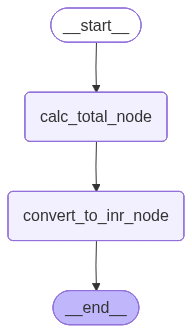

In [ ]:
# Visualize the graph structure
from IPython.display import Image, display

# Draw and display the graph as a Mermaid diagram
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
# Execute the graph with sample input
# Input: 100,000 USD
# Expected: 100,000 * 1.08 = 108,000 USD, then 108,000 * 85 = 9,180,000 INR
graph.invoke({"amount_usd": 100000})

{'amount_usd': 100000, 'total_usd': 108000.0, 'total_inr': 9180000.0}